In [30]:
import sys
import cProfile
import numpy as np
import scipy
import time
import cv2
from pprint import pprint

Simulate sys input for part 1

In [3]:
sys_argv = {}
sys_argv[1] = "part1"  # code section
sys_argv[2] = 5  # number of groupings
sys_argv[3] = "output_file.txt"
input_images = {0: 'part1-images/bigben_10.jpg', 1: 'part1-images/bigben_12.jpg', 2: 'part1-images/bigben_13.jpg', 3: 'part1-images/bigben_14.jpg', 4: 'part1-images/bigben_16.jpg', 5: 'part1-images/bigben_2.jpg', 6: 'part1-images/bigben_3.jpg', 7: 'part1-images/bigben_6.jpg', 8: 'part1-images/bigben_7.jpg', 9: 'part1-images/bigben_8.jpg', 10: 'part1-images/colosseum_11.jpg', 11: 'part1-images/colosseum_12.jpg', 12: 'part1-images/colosseum_13.jpg', 13: 'part1-images/colosseum_15.jpg', 14: 'part1-images/colosseum_18.jpg', 15: 'part1-images/colosseum_3.jpg', 16: 'part1-images/colosseum_4.jpg', 17: 'part1-images/colosseum_5.jpg', 18: 'part1-images/colosseum_6.jpg', 19: 'part1-images/colosseum_8.jpg', 20: 'part1-images/eiffel_15.jpg', 21: 'part1-images/eiffel_18.jpg', 22: 'part1-images/eiffel_19.jpg', 23: 'part1-images/eiffel_1.jpg', 24: 'part1-images/eiffel_22.jpg', 25: 'part1-images/eiffel_2.jpg', 26: 'part1-images/eiffel_3.jpg', 27: 'part1-images/eiffel_5.jpg', 28: 'part1-images/eiffel_6.jpg', 29: 'part1-images/eiffel_7.jpg', 30: 'part1-images/empirestate_10.jpg', 31: 'part1-images/empirestate_12.jpg', 32: 'part1-images/empirestate_14.jpg', 33: 'part1-images/empirestate_15.jpg', 34: 'part1-images/empirestate_16.jpg', 35: 'part1-images/empirestate_22.jpg', 36: 'part1-images/empirestate_23.jpg', 37: 'part1-images/empirestate_25.jpg', 38: 'part1-images/empirestate_27.jpg', 39: 'part1-images/empirestate_9.jpg', 40: 'part1-images/londoneye_12.jpg', 41: 'part1-images/londoneye_13.jpg', 42: 'part1-images/londoneye_16.jpg', 43: 'part1-images/londoneye_17.jpg', 44: 'part1-images/londoneye_21.jpg', 45: 'part1-images/londoneye_22.jpg', 46: 'part1-images/londoneye_23.jpg', 47: 'part1-images/londoneye_2.jpg', 48: 'part1-images/londoneye_8.jpg', 49: 'part1-images/londoneye_9.jpg', 50: 'part1-images/louvre_10.jpg', 51: 'part1-images/louvre_11.jpg', 52: 'part1-images/louvre_13.jpg', 53: 'part1-images/louvre_14.jpg', 54: 'part1-images/louvre_15.jpg', 55: 'part1-images/louvre_16.jpg', 56: 'part1-images/louvre_3.jpg', 57: 'part1-images/louvre_4.jpg', 58: 'part1-images/louvre_8.jpg', 59: 'part1-images/louvre_9.jpg', 60: 'part1-images/notredame_14.jpg', 61: 'part1-images/notredame_19.jpg', 62: 'part1-images/notredame_1.jpg', 63: 'part1-images/notredame_20.jpg', 64: 'part1-images/notredame_24.jpg', 65: 'part1-images/notredame_25.jpg', 66: 'part1-images/notredame_4.jpg', 67: 'part1-images/notredame_5.jpg', 68: 'part1-images/notredame_8.jpg', 69: 'part1-images/sanmarco_13.jpg', 70: 'part1-images/sanmarco_14.jpg', 71: 'part1-images/sanmarco_18.jpg', 72: 'part1-images/sanmarco_19.jpg', 73: 'part1-images/sanmarco_1.jpg', 74: 'part1-images/sanmarco_3.jpg', 75: 'part1-images/sanmarco_4.jpg', 76: 'part1-images/sanmarco_5.jpg', 77: 'part1-images/tatemodern_11.jpg', 78: 'part1-images/tatemodern_13.jpg', 79: 'part1-images/tatemodern_14.jpg', 80: 'part1-images/tatemodern_16.jpg', 81: 'part1-images/tatemodern_24.jpg', 82: 'part1-images/tatemodern_2.jpg', 83: 'part1-images/tatemodern_4.jpg', 84: 'part1-images/tatemodern_6.jpg', 85: 'part1-images/tatemodern_8.jpg', 86: 'part1-images/tatemodern_9.jpg', 87: 'part1-images/trafalgarsquare_15.jpg', 88: 'part1-images/trafalgarsquare_16.jpg', 89: 'part1-images/trafalgarsquare_20.jpg', 90: 'part1-images/trafalgarsquare_21.jpg', 91: 'part1-images/trafalgarsquare_22.jpg', 92: 'part1-images/trafalgarsquare_25.jpg'}

Main code for Part 1

In [86]:
# def part1():
starttime = time.time()
# change sys_argv  to sys.argv for linux version
k, output_file = sys_argv[2],sys_argv[3]  # change to -1 for output_file
#   commented out for jupyter
#   input_images = {}
#     for i in range(3,len(sys.argv)-1):
#         input_images[i-3] = sys.argv[i]

# Checks to see if a keypoint is within another keypoint
def within_circle(keypoint1, keypoint2):
    proj = (keypoint1.size/2) / (2 ** (0.5))
    if keypoint1.pt[0] - proj < keypoint2.pt[0] and keypoint1.pt[0] + proj > keypoint2.pt[0]:
        if keypoint1.pt[1] - proj < keypoint2.pt[1] and keypoint1.pt[1] + proj > keypoint2.pt[1]:
            return True
        else:
            return False
    else:
        return False

# get keypoints and descriptors for each image
orb_images = {}
for key, image in input_images.items():
    orb_images[image] = {}
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    orb = cv2.ORB_create(nfeatures=1000)
    keypoints, descriptors = orb.detectAndCompute(img, None)
    for i in range(len(keypoints)):
        orb_images[image][i] = {'keypoints':keypoints[i], 'descriptors':descriptors[i]}
    
    
    # non-maximum suppression
    nonmax, i = False, 0
    while nonmax == False:
        for j in range(i,len(orb_images[image])):
            if within_circle(orb_images[image][i]['keypoints'],orb_images[image][j]['keypoints']):
                if orb_images[image][i]['keypoints'].response > orb_images[image][j]['keypoints'].response:
                    # remove j item
                    orb_images[image].pop(j)
                else:
                    #remove i item and break loop
                    orb_images[image].pop(i)
                    break
        i += 1
        if i > len(orb_images[image]):
            nonmax = True
    
print(time.time() - starttime)

4.887855291366577


In [87]:
starttime = time.time()
common_points_matrix = {}
for key1, image1 in input_images.items():
    common_points_matrix[image1] = {}
    for key2, image2 in input_images.items():
        common_points = 0
        if image1 != image2 and image1 == 'part1-images/bigben_6.jpg'and image2 == 'part1-images/bigben_8.jpg':
            for i in orb_images[image1]:
                for j in orb_images[image2]:
                    distance = cv2.norm(orb_images[image1][i]['descriptors'], orb_images[image2][j]['descriptors'], cv2.NORM_HAMMING)
                    if distance <= 60:
                        common_points += 1
                        break
        common_points_matrix[image1][image2] = common_points
#         print(image1, image2, common_points, time.time() - starttime)
        
print("my bfer", common_points_matrix['part1-images/bigben_6.jpg'])

print(time.time() - starttime)


my bfer {'part1-images/bigben_10.jpg': 0, 'part1-images/bigben_12.jpg': 0, 'part1-images/bigben_13.jpg': 0, 'part1-images/bigben_14.jpg': 0, 'part1-images/bigben_16.jpg': 0, 'part1-images/bigben_2.jpg': 0, 'part1-images/bigben_3.jpg': 0, 'part1-images/bigben_6.jpg': 0, 'part1-images/bigben_7.jpg': 0, 'part1-images/bigben_8.jpg': 264, 'part1-images/colosseum_11.jpg': 0, 'part1-images/colosseum_12.jpg': 0, 'part1-images/colosseum_13.jpg': 0, 'part1-images/colosseum_15.jpg': 0, 'part1-images/colosseum_18.jpg': 0, 'part1-images/colosseum_3.jpg': 0, 'part1-images/colosseum_4.jpg': 0, 'part1-images/colosseum_5.jpg': 0, 'part1-images/colosseum_6.jpg': 0, 'part1-images/colosseum_8.jpg': 0, 'part1-images/eiffel_15.jpg': 0, 'part1-images/eiffel_18.jpg': 0, 'part1-images/eiffel_19.jpg': 0, 'part1-images/eiffel_1.jpg': 0, 'part1-images/eiffel_22.jpg': 0, 'part1-images/eiffel_2.jpg': 0, 'part1-images/eiffel_3.jpg': 0, 'part1-images/eiffel_5.jpg': 0, 'part1-images/eiffel_6.jpg': 0, 'part1-images/eif

Alternate Program

In [89]:
# def part1():
starttime = time.time()
# change sys_argv  to sys.argv for linux version
k, output_file = sys_argv[2],sys_argv[3]  # change to -1 for output_file
#   commented out for jupyter
#   input_images = {}
#     for i in range(3,len(sys.argv)-1):
#         input_images[i-3] = sys.argv[i]


# get keypoints and descriptors for each image
orb_images = {}
for key, image in input_images.items():
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    orb = cv2.ORB_create(nfeatures=1000)
    keypoints, descriptors = orb.detectAndCompute(img, None)
    orb_images[image] = {'keypoints':keypoints, 'descriptors':descriptors}
        
print(time.time() - starttime)

3.9287517070770264


In [90]:
starttime = time.time()
common_points_matrix = {}
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
for key1, image1 in input_images.items():
    common_points_matrix[image1] = {}
    for key2, image2 in input_images.items():
        common_points = 0
        if image1 != image2 and image1 == 'part1-images/bigben_6.jpg' and image2 == 'part1-images/bigben_8.jpg':  # 
            matches = bf.match(orb_images[image1]['descriptors'],orb_images[image2]['descriptors'])
            common_points = len(matches)
            
        common_points_matrix[image1][image2] = common_points
#         print(image1, image2, common_points, time.time() - starttime)
        
pprint(common_points_matrix['part1-images/bigben_6.jpg']['part1-images/bigben_8.jpg'])

print(time.time() - starttime)

477
0.0319979190826416


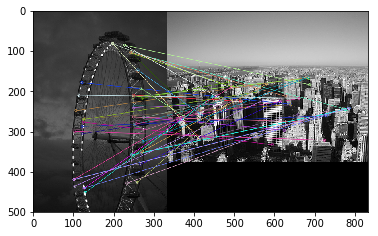

(<matplotlib.image.AxesImage at 0x158f4923668>, None)

In [100]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img1 = cv2.imread('part1-images/londoneye_8.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('part1-images/empirestate_22.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2, matches[:50], img2,flags=2)
plt.imshow(img3),plt.show()


In [ ]:
# Load each image, and get the keypoints and descriptors for each image

# compare each image to each other, and look for common points

# Optional -- non-maximal suppression
# eliminate descriptors within the image that are similar to other ones
# initial threshold = 0.95

# for each image, count descriptors that are the same, within a threshold
# initial threshold = 0.95 (a guess)

# save a matrix of how many descriptors in common.

# kmeans approach
# then, pick k random images to be the "center images"
# then, by voting, assign them to a group. count the number of common points in each group.
# iterate for new centroids
# take the worst performing centroid, and randomly picking a new one,#
# check to make sure it's a new point, also check to make sure it's substantially different
# than the one it replaced?


# grouping
# take first image and make that a group
# take second image, and if it is close enough to first group, put as part of first group
# if not, create second group.
# third image is compared to two groups, if it doesn't cross the threshold, a new group is formed
# all the way until max number of groups is reached, or images are done.
# if max hit, then it goes to the one it fits with the best
# initial threshold

# alternate kmeans
# similar images would be likely similarily dissimilar, so I can use their difference to
# a reference point...but what reference point??

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread("part1-images/bigben_10.jpg", cv2.IMREAD_GRAYSCALE)

# you can increase nfeatures to adjust how many features to detect 
orb = cv2.ORB_create(nfeatures=1000)

# detect features 
(keypoints, descriptors) = orb.detectAndCompute(img, None)

# put a little X on each feature
for i in range(0, len(keypoints)):
    print("Keypoint #%d: x=%d, y=%d, descriptor=%s, distance between this descriptor and descriptor #0 is %d" % (i, keypoints[i].pt[0], keypoints[i].pt[1], np.array2string(descriptors[i]), cv2.norm( descriptors[0], descriptors[i], cv2.NORM_HAMMING)))
    print(cv2.norm( descriptors[0], descriptors[i], cv2.NORM_HAMMING))
    print('\n')
    for j in range(-5, 5):
        img[int(keypoints[i].pt[1])+j, int(keypoints[i].pt[0])+j] = 0 
        img[int(keypoints[i].pt[1])-j, int(keypoints[i].pt[0])+j] = 255 

cv2.imwrite("lincoln-orb.jpg", img)

Main Program

In [ ]:
if part == "part1":
    cProfile.run("part1()")
elif part == "part2":
    print(part)
elif part == "part3":
    print(part)
else:
    print("You did not enter 'part1', 'part2', or 'part3' to run the program. Please check your input.  Thank you.")
